# Section 2: Sentiment Analysis on SnappFood dataset

## Sentiment Analysis without using Neural Networks

In [1]:
!pip install parsivar

In [2]:
# Loading NLTk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# NLP libraries
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks

# plot
import matplotlib.pyplot as plt

import pandas as pd
import string
import re
import numpy as np
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

### Read dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's read SnappFood dataset.
If we open these files with notepad, we see that the columns seprated by tab, so, we should specify seprator in read_csv function.

In [5]:
# read csv dataset
train = pd.read_csv('/content/drive/MyDrive/AI-Internship/snappfood/snappfood/train.csv', sep='\t')
valid = pd.read_csv('/content/drive/MyDrive/AI-Internship/snappfood/snappfood/dev.csv', sep='\t')
test = pd.read_csv('/content/drive/MyDrive/AI-Internship/snappfood/snappfood/test.csv', sep='\t')

# pritn shape of each dataset
print(f'train_data shape : {train.shape}')
print(f'valid_data shape : {valid.shape}')
print(f'test_data shape : {test.shape}')

train_data shape : (56700, 4)
valid_data shape : (6300, 4)
test_data shape : (7000, 4)


In [6]:
train.head()

,Unnamed: 0,comment,label,label_id
0,0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [7]:
valid.head()

,Unnamed: 0,comment,label,label_id
0,0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,SAD,1
1,1,تشکر، عالی‌تر از همیشه,HAPPY,0
2,2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,HAPPY,0
3,3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,SAD,1
4,4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,SAD,1


In [8]:
test.head()

,Unnamed: 0,comment,label,label_id
0,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0
1,1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0
2,2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1
3,3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1
4,4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1


### Data Cleaning

#### Remove irrelevant columns

Now we should remove irrelevant columns in each dataset.

In [9]:
train_data = train.copy()
valid_data = valid.copy()
test_data = test.copy()

train_data.drop(labels=['Unnamed: 0','label'], axis=1, inplace=True) # remove useless columns
valid_data.drop(labels=['Unnamed: 0','label'], axis=1, inplace=True) # remove useless columns
test_data.drop(labels=['Unnamed: 0','label'], axis=1, inplace=True) # remove useless columns

In [10]:
print(f'train_data shape : {train_data.shape}')
print(f'valid_data shape : {valid_data.shape}')
print(f'test_data shape : {test_data.shape}')

train_data shape : (56700, 2)
valid_data shape : (6300, 2)
test_data shape : (7000, 2)


In [11]:
train_data.head()

,comment,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0
4,شیرینی وانیلی فقط یک مدل بود.,0


#### Change header name

In [12]:
#change header name
train_data.columns = ['comment','label']
valid_data.columns = ['comment','label']
test_data.columns = ['comment','label']

In [13]:
train_data.head()

,comment,label
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,0
4,شیرینی وانیلی فقط یک مدل بود.,0


Because we want to use the polarity of each word, we should change the label from 1 to -1 (for negative comments) and change the label from 0 to 1 (for positive comments).

In [14]:
# 0 means HAPPY and 1 means SAD
train_data.label[train_data.label == 1] = -1
train_data.label[train_data.label == 0] = 1

valid_data.label[valid_data.label == 1] = -1
valid_data.label[valid_data.label == 0] = 1

test_data.label[test_data.label == 1] = -1
test_data.label[test_data.label == 0] = 1

In [15]:
train_data.head()

,comment,label
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,-1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,1
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,-1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,1
4,شیرینی وانیلی فقط یک مدل بود.,1


###EDA

Description of each columns:


*   comment : people's opinion about food and restaurant
*   label : 1 means positive comment and 0 means negative comment





In the beginning, we should check the existence of null data to treat them.

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  56700 non-null  object
 1   label    56700 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 886.1+ KB


In [17]:
train_data.isnull().sum()

comment    0
label      0
dtype: int64

In [18]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  6300 non-null   object
 1   label    6300 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 98.6+ KB


In [19]:
valid_data.isnull().sum()

comment    0
label      0
dtype: int64

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  7000 non-null   object
 1   label    7000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.5+ KB


In [21]:
test_data.isnull().sum()

comment    0
label      0
dtype: int64

As wee saw, we don't have null data in train, valid and test data.

Let's see distribution of train, valid and test dataset.

In [22]:
train_data.label.value_counts()

-1    28350
 1    28350
Name: label, dtype: int64

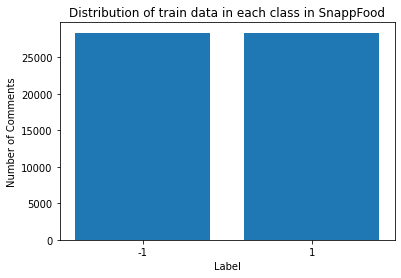

In [23]:
# distribution of data in each class
distribution = list(train_data.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['-1', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.title("Distribution of train data in each class in SnappFood")
plt.show()

Let's print one example of each class.


In [24]:
# sample happy comment
train_data[train_data['label']==1].sample(n=1)['comment'].iloc[0]

'خوب بود ولی اگر شیرینی کمتری داشته باشد بهتر می\u200cباشد.'

If in text preprocessing fuction, we replace half-space with ' ' we have better representation of sentence.

In [25]:
review = 'خوب بود ولی اگر شیرینی کمتری داشته باشد بهتر می‌باشد.'
review =  re.sub('\u200c', ' ',review)
review

'خوب بود ولی اگر شیرینی کمتری داشته باشد بهتر می باشد.'

\u200c represents half-space between 'می' and 'باشد'.

In [26]:
# sample sad comment
train_data[train_data['label']==-1].sample(n=1)['comment'].iloc[0]

'پیتزا اصلا با کیفیت نبود.'

In [27]:
valid_data.label.value_counts()

-1    3150
 1    3150
Name: label, dtype: int64

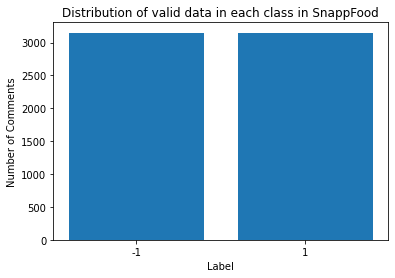

In [28]:
# distribution of data in each class
distribution = list(valid_data.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['-1', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.title("Distribution of valid data in each class in SnappFood")
plt.show()

In [29]:
test_data.label.value_counts()

-1    3500
 1    3500
Name: label, dtype: int64

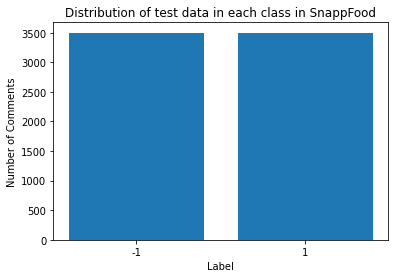

In [30]:
# distribution of data in each class
distribution = list(test_data.label.value_counts())

import matplotlib.pyplot as plt
plt.bar(['-1', '1'] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Comments")
plt.title("Distribution of test data in each class in SnappFood")
plt.show()

As we saw, we have balaced data.

Before we start doing sentiment analysis, we should read the PerSent.xlsx file that contains the word and polarity of each word.

In [31]:
from pandas import read_excel

my_sheet = 'Dataset' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = r'/content/drive/MyDrive/AI-Internship/PerSent.xlsx' 
persent = read_excel(file_name, sheet_name = my_sheet)

In [32]:
persent.head()

,Words,POS,Polarity
0,خوب,Adj,0.70
1,بد,Adj,-0.69
2,درست,Adj,0.00
3,غلط,Adj,-0.50
4,زیبا,Adj,0.00


In [33]:
persent.shape

(1490, 3)

In [34]:
persent.Words[774]

'ته دوزی'

### Text preprocessing


#### Stop Words


In [35]:
# define a function to read file
def readFile(filename):
  fileObj = open(filename, 'r') # open the file in read mode
  words = fileObj.read().splitlines() # puts the file into an array
  fileObj.close()
  return words

In [36]:
stopwords = readFile('/content/drive/MyDrive/AI-Internship/persian_stopwords_kharazi.txt')
print(f'length of stop words : {len(stopwords)}')

length of stop words : 1370


In [37]:
print(f'some of stop words : {stopwords[:30]}')

some of stop words : ['!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان']


#### Preprocessing function

Because, after stemming we have '&' in between of our verbs, we should delete them in function delete_and.

In [64]:
def delete_and(word):
  idx = word.find("&")
  if idx!=-1:
    word = word[:idx]
  return word

In [69]:
def data_preprocessing(review, stopwords):
  try:
    # replace half-space with ' '
    review =  re.sub('\u200c', ' ',review)

    # Normalizing the text
    # First we should normalize text in order to convert persian numbers into english numbers then
    # with following function (filter) delete them
    # Because, some comments are pinglish, we should set pinglish_conversion_needed = True
    normalizer = Normalizer(pinglish_conversion_needed=True) 
    review = normalizer.normalize(review)

    # because after normalization appear some '/u200c', we should replace them with space
    review =  re.sub('\u200c', ' ',review)

    # delete english characters and numbers from sentences
    review = filter(lambda x: x in string.whitespace or x not in string.printable, review)
    review = ''.join(ch for ch in list(review))
    
    if review != ' ':
      # word tokenization
      tokenizer = Tokenizer()
      words = tokenizer.tokenize_words(review)

      # stemming 
      stemmer = FindStems()
      review = [stemmer.convert_to_stem(word) for word in words]

      # we should delete '&', because after stemming we have '&' in between of our verbs
      review = [delete_and(word) for word in review]

      # remove stop words
      words_without_stopword = filter(lambda x: x not in stopwords, review)
      words_without_stopwords = list(words_without_stopword)
    
      # join words in preprocessed review
      review = ' '.join(words_without_stopwords)
    
    return review

  except TypeError:
    print(review)
    raise

In [54]:
review = 'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود.'
review =  re.sub('\u200c', ' ',review)
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود.'

In [55]:
normalizer = Normalizer(pinglish_conversion_needed=True) 
review = normalizer.normalize(review)
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم\u200cبود .'

In [56]:
review =  re.sub('\u200c', ' ',review)
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود .'

In [57]:
review = filter(lambda x: x in string.whitespace or x not in string.printable, review)
review = ''.join(ch for ch in list(review))
review

'غذا به سرعت تحویل داده شد ولی حجم ساندویچ کم بود '

In [58]:
tokenizer = Tokenizer()
words = tokenizer.tokenize_words(review)
words

['غذا',
 'به',
 'سرعت',
 'تحویل',
 'داده',
 'شد',
 'ولی',
 'حجم',
 'ساندویچ',
 'کم',
 'بود']

In [59]:
stemmer = FindStems()
review = [stemmer.convert_to_stem(word) for word in words]
review

['غذا',
 'به',
 'سرعت',
 'تحویل',
 'داده',
 'شد',
 'ولی',
 'حجم',
 'ساندویچ',
 'کم',
 'بود&باش']

In [48]:
def delete_and(word):
  idx = word.find("&")
  if idx!=-1:
    word = word[:idx]
  return word

In [51]:
word = delete_and('کرد &کن')
word

'کرد '

In [60]:
review = [delete_and(word) for word in review]

In [61]:
review

['غذا',
 'به',
 'سرعت',
 'تحویل',
 'داده',
 'شد',
 'ولی',
 'حجم',
 'ساندویچ',
 'کم',
 'بود']

In [62]:
words_without_stopword = filter(lambda x: x not in stopwords, review)
words_without_stopwords = list(words_without_stopword)
words_without_stopwords

['غذا', 'سرعت', 'تحویل', 'حجم', 'ساندویچ']

In [63]:
review = ' '.join(words_without_stopwords)
review

'غذا سرعت تحویل حجم ساندویچ'

In [70]:
! pip install pandarallel

In [71]:
from pandarallel import pandarallel

In [72]:
# initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Let's apply this function on our dataset. This work, took 39 minutes for me.

In [73]:
train_data['preprocessing_text'] = train_data['comment'].parallel_apply(lambda text: data_preprocessing(text, stopwords))
valid_data['preprocessing_text'] = valid_data['comment'].parallel_apply(lambda text: data_preprocessing(text, stopwords))
test_data['preprocessing_text'] = test_data['comment'].parallel_apply(lambda text: data_preprocessing(text, stopwords))


In [74]:
# #Save dataframe
# !mkdir -p /content/drive/MyDrive/AI-Internship/SnappFood_preprocessed
# train_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')
# valid_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/valid_data')
# test_data.to_pickle('/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/test_data')

In [ ]:
#load the preprocessing dataframe
train_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')
valid_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')
test_data= pd.read_pickle(r'/content/drive/MyDrive/AI-Internship/SnappFood_preprocessed/train_data')


In [75]:
train_data.head()

,comment,label,preprocessing_text
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,-1,حیف وقت نوشت سرویس دهیتون افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,1,قرار ساعته برسه نیم ساعت موقع دید چقدررررررررر...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,-1,قیمت مدل کیفیت سازگاری نداره ظاهر فریبنده پرش ...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,1,عالللی اندازه کیفیت امیداورم کیفیتتون باشه مشت...
4,شیرینی وانیلی فقط یک مدل بود.,1,شیرینی نیل مدل


In [76]:
valid_data.head()

,comment,label,preprocessing_text
0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,-1,ساندویچ سرد صورتی فاصله رستوران دقیقه اس
1,تشکر، عالی‌تر از همیشه,1,تشکر عالی
2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,1,مرغ کدو دوس ساندویچ خوشمزه
3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,-1,نمیدونم هزینه بسته بند دلیل ؟؟؟
4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,-1,نوشابه ارسال تاخیر فراوان غذا سرد


In [77]:
test_data.head()

,comment,label,preprocessing_text
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,1,خواهشا خواهشا خواهشا سه ارسال شیرینی فکری شانس...
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,1,غذا گرم کیفیت پخت گوشت عالی
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,-1,قیمت سس شکلات بسته بند قیمت اعلامی اسنپ تومن ت...
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,-1,عکس پیج شیرینی شکری روشن رنگ هممون قاعدتا تست ...
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,-1,میگ پیتزا اینقد چرب باشه


Let's print some of examples from train dataset.

In [79]:
# this example is in pinglish 
print(f'row 13 of train_data (before preprocessing) : {train_data.comment[13]}')
print(f'row 13 of train_data (after preprocessing) : {train_data.preprocessing_text[13]}')

row 13 of train_data (before preprocessing) : Kheili khub bud mersi vaghan
row 13 of train_data (after preprocessing) : 


In [80]:
# this example is in eglish and persian
print(f'row 68 of train_data (before preprocessing) : {train_data.comment[68]}')
print(f'row 68 of train_data (after preprocessing) : {train_data.preprocessing_text[68]}')

row 68 of train_data (before preprocessing) : The nutella and caramel rolls are AMAZING!!! GREAT service and very delicious desserts- عالى!!!!
row 68 of train_data (after preprocessing) : اره ور عالی


In [81]:
# this example is in pinglish 
print(f'row 1347 of train_data (before preprocessing) : {train_data.comment[1347]}')
print(f'row 1347 of train_data (after preprocessing) : {train_data.preprocessing_text[1347]}')

row 1347 of train_data (before preprocessing) : Eclair behtarin o khoshmaze tarin shirinihae tehrano dare kolan
row 1347 of train_data (after preprocessing) : خوشمزه کلان


In [82]:
# this example is in pinglish 
print(f'row 2659 of train_data (before preprocessing) : {train_data.comment[2659]}')
print(f'row 2659 of train_data (after preprocessing) : {train_data.preprocessing_text[2659]}')

row 2659 of train_data (before preprocessing) : Margarita pizza is the simplest pizza and a great test for a pizza place- The Italians don’t bake the pizza with basil for a reason
row 2659 of train_data (after preprocessing) : تست


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comment             56700 non-null  object
 1   label               56700 non-null  int64 
 2   preprocessing_text  56700 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [86]:
def find_empty_rows(df):
  row_num = []
  for i in range(df.shape(0)):
    if df.preprocessing_text[i] == "" or df.preprocessing_text[i] == " ":
      row_num.append(i)
  return row_num    


In [ ]:
train_idx = find_emptu